In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import openweathermapy.core as ow

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [11]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)

617

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
cities_info = []
# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("=====================")
for city in cities:
    query_url = f"{url}&units={units}&q={city}&appid={api_key}"
    response = requests.get(query_url).json()
    if 'coord' in response:
        cities_info.append(response)
        count = len(cities_info)
        if (count <= 50):
            recordSet = 1
            recordNum = count
        else:
            recordNum = (count - 1) % 50
            recordSet = (count - 1) // 50 + 1
            
        print(f"Processing Record {recordNum} of Set {recordSet} | {city}")             
    else:
        print("City not found. Skipping...")
print("==========================")
print("Data Retrieval Complete")
print("==========================")

    


Beginning Data Retrieval
Processing Record 1 of Set 1 | sao felix do xingu
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | yar-sale
Processing Record 7 of Set 1 | arlit
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | belyy yar
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | ocos
City not found. Skipping...
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | siocon
City not found. Skipping...
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | hofn
Processing Record 23

Processing Record 32 of Set 4 | nioro
Processing Record 33 of Set 4 | maunabo
Processing Record 34 of Set 4 | kibondo
Processing Record 35 of Set 4 | port moresby
Processing Record 36 of Set 4 | asosa
Processing Record 37 of Set 4 | barcelona
Processing Record 38 of Set 4 | vardo
Processing Record 39 of Set 4 | namibe
Processing Record 40 of Set 4 | dawei
Processing Record 41 of Set 4 | meulaboh
Processing Record 42 of Set 4 | kapit
Processing Record 43 of Set 4 | narasannapeta
Processing Record 44 of Set 4 | awbari
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 45 of Set 4 | madisonville
Processing Record 46 of Set 4 | nishihara
Processing Record 47 of Set 4 | ambilobe
Processing Record 48 of Set 4 | bossangoa
Processing Record 49 of Set 4 | castro
Processing Record 0 of Set 5 | chesterville
Processing Record 1 of Set 5 | jennings
Processing Record 2 of Set 5 | weinan
Processing Record 3 of Set 5 | tiksi
Processing Record 4 of Set

Processing Record 16 of Set 8 | pontian kecil
Processing Record 17 of Set 8 | caravelas
Processing Record 18 of Set 8 | straumen
Processing Record 19 of Set 8 | santa fe
Processing Record 20 of Set 8 | havre-saint-pierre
Processing Record 21 of Set 8 | tura
Processing Record 22 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 23 of Set 8 | nanortalik
Processing Record 24 of Set 8 | makhachkala
Processing Record 25 of Set 8 | bouillante
Processing Record 26 of Set 8 | dandong
Processing Record 27 of Set 8 | inuvik
Processing Record 28 of Set 8 | nurota
Processing Record 29 of Set 8 | santa cruz
Processing Record 30 of Set 8 | manuk mangkaw
Processing Record 31 of Set 8 | pervomayskiy
Processing Record 32 of Set 8 | nyurba
Processing Record 33 of Set 8 | vega de alatorre
Processing Record 34 of Set 8 | ulaangom
Processing Record 35 of Set 8 | am timan
Processing Record 36 of Set 8 | port hardy
Processing Record 37 of Set 8 | shahr-e babak
Processing Record 38 of Set 8 | maragogi
Ci

In [61]:
name = [i['name'] for i in cities_info]
names1 = []
names2=[]
clouds = [i['clouds']['all'] for i in cities_info]
clouds1 = []
clouds2=[]
country = [i['sys']['country'] for i in cities_info]
date = [i['dt'] for i in cities_info]
hum = [i['main']['humidity'] for i in cities_info]
hum1=[]
hum2=[]
lat = [i['coord']['lat'] for i in cities_info]
lng = [i['coord']['lon'] for i in cities_info]
max_temp = [i['main']['temp_max'] for i in cities_info]
wind_speed = [i['wind']['speed'] for i in cities_info]
wind_speed1 = []
wind_speed2 = []
north_lats = []
south_lats = []
max_temp1 = []
max_temp2 = []
for x in cities_info:
    if x['coord']['lat'] >= 0:
        names1.append(x['name'])
        north_lats.append(x['coord']['lat'])
        max_temp1.append(x['main']['temp_max'])
        hum1.append(x['main']['humidity'])
        clouds1.append(x['clouds']['all'])
        wind_speed1.append(x['wind']['speed'])
    else:
        names2.append(x['name'])
        south_lats.append(x['coord']['lat'])
        max_temp2.append(x['main']['temp_max'])
        hum2.append(x['main']['humidity'])
        clouds2.append(x['clouds']['all'])
        wind_speed2.append(x['wind']['speed'])

north_hem_data = {"City":names1, 'Cloudiness':clouds1, 'Humidity':hum1, "Lats": north_lats, "Max Temp":max_temp1, "Wind Speed":wind_speed1}
south_hem_data = {"City":names2, 'Cloudiness':clouds2, 'Humidity':hum2, "Lats": south_lats, "Max Temp":max_temp2, "Wind Speed":wind_speed2}
data = {'City': name, 'Cloudiness':clouds, 'Country':country, "Date":date, "Humidity":hum, "Lat":lat, "Lng":lng, "Max Temp":max_temp, "Wind Speed":wind_speed}

In [62]:
data1 = pd.DataFrame(data)
data1.count()


City          540
Cloudiness    540
Country       540
Date          540
Humidity      540
Lat           540
Lng           540
Max Temp      540
Wind Speed    540
dtype: int64

In [63]:
exported_data = data1.to_csv(r'output_file')
data1.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sao Felix do Xingu,100,BR,1578361714,97,-6.64,-51.99,70.43,0.94
1,Victoria,75,BN,1578361287,74,5.28,115.24,84.20,3.36
2,Port Elizabeth,1,US,1578361579,51,39.31,-74.98,45.00,7.63
3,Vaini,75,IN,1578361482,94,15.34,74.49,68.00,9.17
4,Qaanaaq,32,GL,1578361562,84,77.48,-69.36,-18.02,11.54


This code creates a scatter plot which compares the latitudes of each city and the maximum temperature the city reached on January 6th. The latitudes closer to the equator show higher maximum temperatures while those further from the equator (especially to the North) have much lower maximum temperatures.


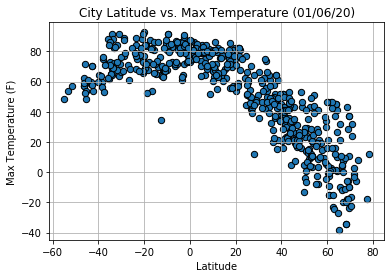

In [64]:
max_temp_lat = data1.plot.scatter("Lat",'Max Temp', edgecolor='black', s=40)
max_temp_lat.set_title("City Latitude vs. Max Temperature (01/06/20)")
max_temp_lat.set_ylabel("Max Temperature (F)")
max_temp_lat.set_xlabel("Latitude")
max_temp_lat.set_yticks(np.arange(-40, 100, 20))
max_temp_lat.grid()
print("This code creates a scatter plot which compares the latitudes of each city and the maximum temperature the city reached on January 6th. The latitudes closer to the equator show higher maximum temperatures while those further from the equator (especially to the North) have much lower maximum temperatures.")


This code creates a scatter plot which compares the latitudes of each city and the humidity the city reached on January 6th. This plot doees not demonstrate a relationship between latitude and humidity as the humidity percentage varies throughout.


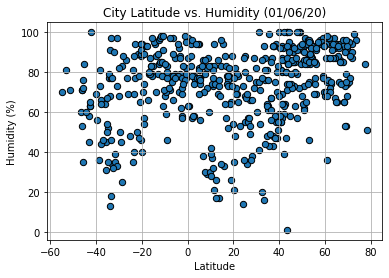

In [65]:
lat_humidity = data1.plot.scatter("Lat", "Humidity", edgecolor='black', s=40)
lat_humidity.set_title("City Latitude vs. Humidity (01/06/20)")
lat_humidity.set_ylabel("Humidity (%)")
lat_humidity.set_xlabel("Latitude")
lat_humidity.grid()
print("This code creates a scatter plot which compares the latitudes of each city and the humidity the city reached on January 6th. This plot doees not demonstrate a relationship between latitude and humidity as the humidity percentage varies throughout.")

This code creates a scatter plot which compares the latitudes of each city and the cloud percentage the city reached on January 6th. This plot shows that the percentage of clouds varies by latitude and that there is no direct correlation between the two.


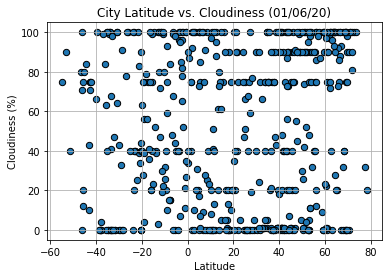

In [67]:
lat_cloudiness = data1.plot.scatter("Lat","Cloudiness", edgecolor='black', s=40)
lat_cloudiness.set_title("City Latitude vs. Cloudiness (01/06/20)")
lat_cloudiness.set_ylabel("Cloudiness (%)")
lat_cloudiness.set_xlabel("Latitude")
lat_cloudiness.grid()
print("This code creates a scatter plot which compares the latitudes of each city and the cloud percentage the city reached on January 6th. This plot shows that the percentage of clouds varies by latitude and that there is no direct correlation between the two.")

This code creates a scatter plot from the data on the wind speed at a specific latitude. The latitudes with the highest wind speed are located around latitude 60(The northern hemisphere).


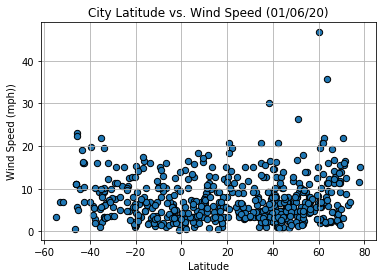

In [68]:
lat_wind_speed = data1.plot.scatter("Lat", "Wind Speed", edgecolor='black', s=40)
lat_wind_speed.set_title("City Latitude vs. Wind Speed (01/06/20)")
lat_wind_speed.set_ylabel("Wind Speed (mph))")
lat_wind_speed.set_xlabel("Latitude")
lat_wind_speed.grid()
print('This code creates a scatter plot from the data on the wind speed at a specific latitude. The latitudes with the highest wind speed are located around latitude 60(The northern hemisphere).')

In [69]:
def lineregress(x,y):
    slope, intercept, rvalue, p_value, std_err =linregress(x, y)   
    plt.plot(x, [intercept + slope*val for val in x], 'r')
    print(f"The R-squared is: {rvalue}")
north_hem_data = data1.loc[data1["Lat"]>= 0]
north_hem_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Victoria,75,BN,1578361287,74,5.28,115.24,84.20,3.36
2,Port Elizabeth,1,US,1578361579,51,39.31,-74.98,45.00,7.63
3,Vaini,75,IN,1578361482,94,15.34,74.49,68.00,9.17
4,Qaanaaq,32,GL,1578361562,84,77.48,-69.36,-18.02,11.54
5,Yar-Sale,93,RU,1578361316,85,66.83,70.83,7.21,14.27


In [70]:
south_hem_data = data1.loc[data1["Lat"]< 0]
south_hem_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sao Felix do Xingu,100,BR,1578361714,97,-6.64,-51.99,70.43,0.94
14,Cape Town,100,ZA,1578361452,68,-33.93,18.42,68.00,9.17
15,Bredasdorp,100,ZA,1578361563,77,-34.53,20.04,64.99,2.24
16,Rikitea,40,PF,1578361561,77,-23.12,-134.97,76.77,12.59
20,Ushuaia,75,AR,1578361457,70,-54.81,-68.31,48.20,3.36


The R-squared is: -0.8648436512878348


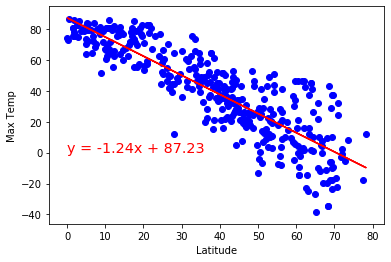

In [76]:
lineregress(north_lats, max_temp1)
slope, intercept, rvalue, p_value, std_err =linregress(north_lats,max_temp1)
plt.scatter(north_lats,max_temp1, c='b')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(0,0,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.savefig("north_max_temp.png")


The R-squared is: 0.4667722952241401
The linear regression in the northern hemisphere plot above demonstrates that the maximum temperature of the cities decreases as the location of the city becomes further and further from the equator. While the southern hemispher plot demonstrates that the maximum temperature of a city will increase as the location becomes closer to the equator.


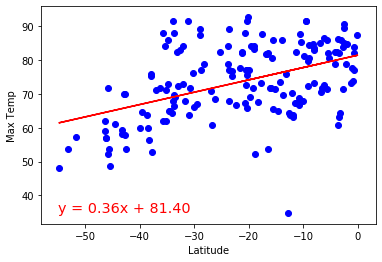

In [77]:
lineregress(south_lats, max_temp2)
slope, intercept, rvalue, p_value, std_err =linregress(south_lats, max_temp2)
plt.scatter(south_lats, max_temp2, c='b')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(-55,35,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.savefig("south_max_temp.png")
print("The linear regression in the northern hemisphere plot above demonstrates that the maximum temperature of the cities decreases as the location of the city becomes further and further from the equator. While the southern hemispher plot demonstrates that the maximum temperature of a city will increase as the location becomes closer to the equator.")



The R-squared is: 0.32728364827804834


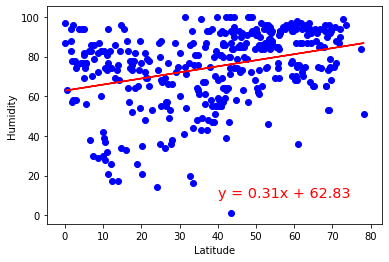

In [78]:
lineregress(north_lats, hum1)
slope, intercept, rvalue, p_value, std_err =linregress(north_lats, hum1)
plt.scatter(north_lats, hum1, c='b')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(40,9,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("north_hum.png")

The R-squared is: 0.38329436110139087
The linear regression above provides us with data that acknowledges the fact that the humidity level increases as the location of the city moves further north. More northern locations tend to be more humid than locations closer to the equator. The second graphic below shows that the linear regression of the humidity levels in accordance to location increases as the location approaches the equator. The data varies throughout the scatter plot, but it can be noted that the locations closer to the equator will have higher humidity levels than those further south of the equator.


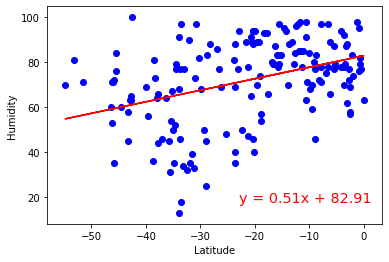

In [79]:
lineregress(south_lats, hum2)
slope, intercept, rvalue, p_value, std_err =linregress(south_lats, hum2)
plt.scatter(south_lats, hum2, c='b')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(-23,18,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("south_hum.png")
print("The linear regression above provides us with data that acknowledges the fact that the humidity level increases as the location of the city moves further north. More northern locations tend to be more humid than locations closer to the equator. The second graphic below shows that the linear regression of the humidity levels in accordance to location increases as the location approaches the equator. The data varies throughout the scatter plot, but it can be noted that the locations closer to the equator will have higher humidity levels than those further south of the equator.")



The R-squared is: 0.19792610348511278


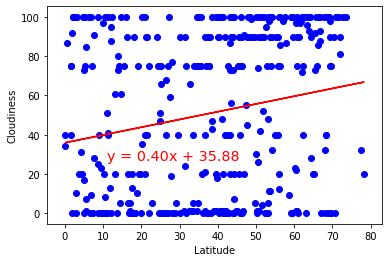

In [80]:
lineregress(north_lats, clouds1)
slope, intercept, rvalue, p_value, std_err =linregress(north_lats, clouds1)
plt.scatter(north_lats, clouds1, c='b')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(11,27,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("north_clouds.png")


The R-squared is: 0.09889244162739662
The linear regression of the northern hemisphere data above identifies a positive slope as to the level of clouds in the area. It appears that more northern locations further from the equator tend to have more clouds than those closer to the equator. While the graphic below on the southern hemisphere data also displays a positive slope with varying levels of clouds as we approach the equator. One will also notice that the latitude that had the lowest levels of clouds was located at -30, so halfway below the equator.


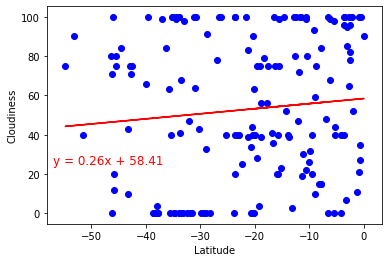

In [81]:
lineregress(south_lats, clouds2)
slope, intercept, rvalue, p_value, std_err =linregress(south_lats, clouds2)
plt.scatter(south_lats, clouds2, c='b')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(-57,25,s=f"y = {slope}x + {intercept}", c='r', size='large')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("south_clouds.png")
print("The linear regression of the northern hemisphere data above identifies a positive slope as to the level of clouds in the area. It appears that more northern locations further from the equator tend to have more clouds than those closer to the equator. While the graphic below on the southern hemisphere data also displays a positive slope with varying levels of clouds as we approach the equator. One will also notice that the latitude that had the lowest levels of clouds was located at -30, so halfway below the equator.")

The R-squared is: 0.13134751486720952


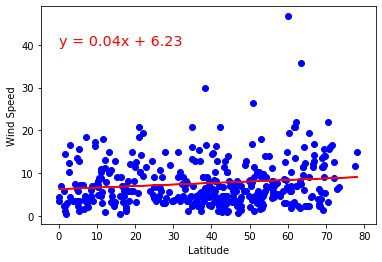

In [31]:
lineregress(north_lats, wind_speed1)
slope, intercept, rvalue, p_value, std_err =linregress(north_lats, wind_speed1)
plt.scatter(north_lats, wind_speed1, c='b')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(0,40,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("north_wind.png")

The R-squared is: -0.27984024766063836
The grphic above on the northern hemisphere data identifies that the wind speed in the north tends to be consistent throughout, with a couple of outliers located way north. All together there is a positive slope meaning that wind speeds tend to increase as one moves further and fuether from the equator. The graphic below on the southern hemisphere data identitifes a negative slope as the location of the city approaches the equator. Meaning that wind speed tends to pick up as one moves further south, but there still are locations that have minimum wind speeds as one moves further form the equator.


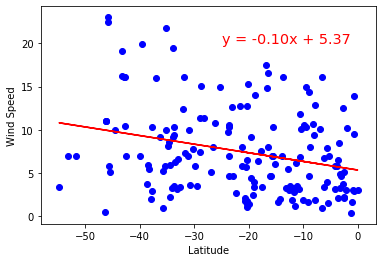

In [82]:
lineregress(south_lats, wind_speed2)
slope, intercept, rvalue, p_value, std_err =linregress(south_lats, wind_speed2)
plt.scatter(south_lats, wind_speed2, c='b')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(-25,20,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("south_wind.png")
print("The grphic above on the northern hemisphere data identifies that the wind speed in the north tends to be consistent throughout, with a couple of outliers located way north. All together there is a positive slope meaning that wind speeds tend to increase as one moves further and fuether from the equator. The graphic below on the southern hemisphere data identitifes a negative slope as the location of the city approaches the equator. Meaning that wind speed tends to pick up as one moves further south, but there still are locations that have minimum wind speeds as one moves further form the equator.")